In [1]:
'''
自动编码器的PaddlePaddle实践代码。
'''
import paddle
from paddle import nn, optimizer


#设置超参数。
INPUT_SIZE = 784 
HIDDEN_SIZE = 256
EPOCHS = 5
BATCH_SIZE = 64
LEARNING_RATE = 1e-3 


paddle_model = nn.Sequential(
    nn.Linear(INPUT_SIZE, HIDDEN_SIZE),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE, INPUT_SIZE)
)

model = paddle.Model(paddle_model)

model.prepare(optimizer=optimizer.Adam(learning_rate=LEARNING_RATE, parameters=model.parameters()),
              loss=nn.MSELoss())

sysctl: unknown oid 'machdep.cpu.leaf7_features'


In [2]:
import pandas as pd


#使用pandas，读取fashion_mnist的训练和测试数据文件。
train_data = pd.read_csv('../datasets/fashion_mnist/fashion_mnist_train.csv')
test_data = pd.read_csv('../datasets/fashion_mnist/fashion_mnist_test.csv')

#从训练数据中，拆解出训练特征和类别标签。
X_train = train_data[train_data.columns[1:]]

#从测试数据中，拆解出测试特征和类别标签。
X_test = test_data[train_data.columns[1:]]

In [3]:
from sklearn.preprocessing import StandardScaler


#初始化数据标准化处理器。
ss = StandardScaler()

#标准化训练数据特征。
X_train = ss.fit_transform(X_train)

#标准化测试数据特征。
X_test = ss.transform(X_test)

In [4]:
from paddle.io import TensorDataset

X_train = paddle.to_tensor(X_train.astype('float32'))

#构建适用于PaddlePaddle模型训练的数据集。
train_dataset = TensorDataset([X_train, X_train])

#启动模型训练，指定训练数据集，设置训练轮次，设置每次数据集计算的批次大小。
model.fit(train_dataset, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step  20/938 [..............................] - loss: 0.5376 - ETA: 7s - 8ms/step

/opt/anaconda3/envs/python_paddle/lib/python3.8/site-packages/paddle/fluid/layers/utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  return (isinstance(seq, collections.Sequence) and


step 938/938 [==============================] - loss: 0.0993 - 7ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0796 - 7ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.2454 - 7ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0721 - 7ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0609 - 7ms/step          


In [5]:
import numpy as np


test_sample = X_test[:1].reshape((28, 28))

reconstructed_features = model.predict(X_test[:1].astype('float32'))

reconstructed_sample = np.array(reconstructed_features[0]).reshape((28, 28))

Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 784


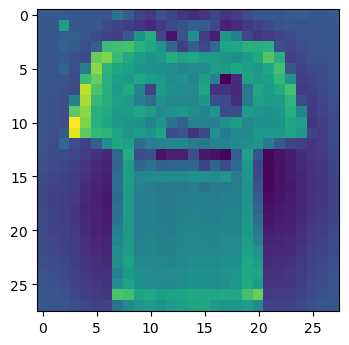

In [6]:
import matplotlib.pyplot as plt


plt.rcParams['figure.dpi'] = 100

#展示原始的图片。
plt.imshow(test_sample)

plt.show()

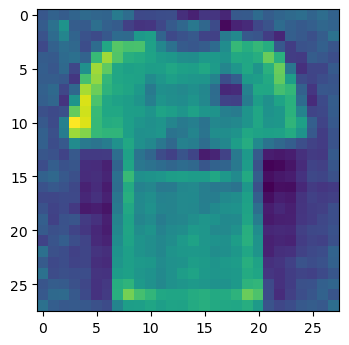

In [7]:
#展示自编码重建的图片。
plt.imshow(reconstructed_sample)

plt.show()